### Import paczek

In [58]:
include("utils/GlobalUsings.jl")
include("utils/DataLoader.jl")
include("Lib/CustomDiffLib.jl")
include("utils/NetFunctions.jl")
include("utils/Ploter.jl")

tripleMetricPlot (generic function with 1 method)

##  Załadowanie danych

In [2]:
X_train, y_train, X_test, y_test, classes  = getPrepearedData()
nothing

## SIEĆ FLUX

In [63]:
include("nets/netFlux.jl")
Random.seed!(4)
fluxNet, opt, loss, params = getDefaultFlux(4)
fluxLossHistory, fluxAccuracyTrainingHistory = trainFlux(fluxNet, params, X_train, y_train, 5, opt, loss)
fluxAccuracyTrainingVal = getTrainingAccValFromHistory(fluxAccuracyTrainingHistory)
fluxAccuracyTestHistory, fluxAccuracyTestVal = getFluxAccuracyValFromTest(fluxNet, X_test, y_test)
nothing

#### Wykresy 

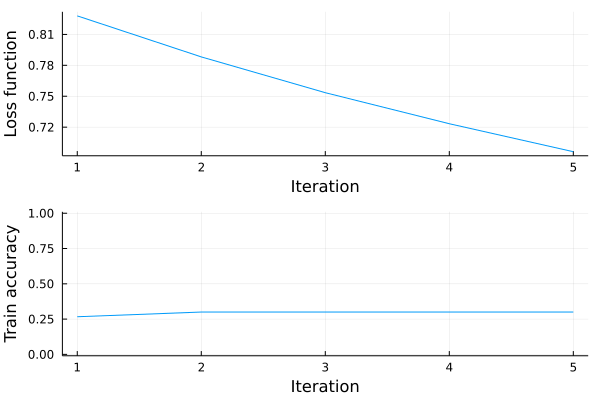

In [64]:
plotLossAccuracy(fluxLossHistory, fluxAccuracyTrainingHistory)

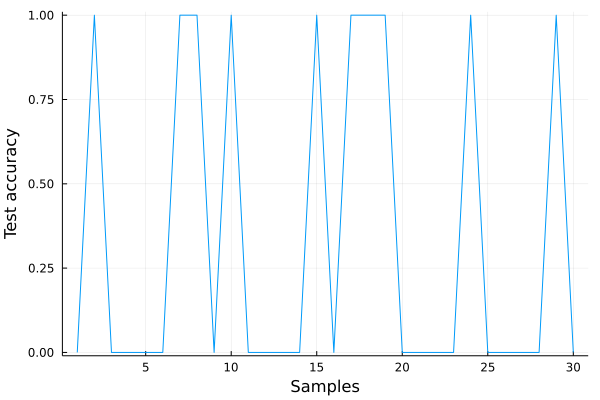

In [5]:
plotTestAccuracty(fluxAccuracyTestHistory)

### Sieć Ani

In [67]:
include("nets/NetAnia.jl")
Random.seed!(5)
aniaNet = getDefaultAniaNet(4)
aniaLossHistory, AniaAccHistory = trainAnia(aniaNet, X_train, y_train, 5, 0.01)
aniaAccTrainVal = getTrainingAccValFromHistory(AniaAccHistory)
aniaAccuracyTestHistory, AniaTestAccVal = accuracy(aniaNet, X_test, y_test)
nothing

### Wykresy

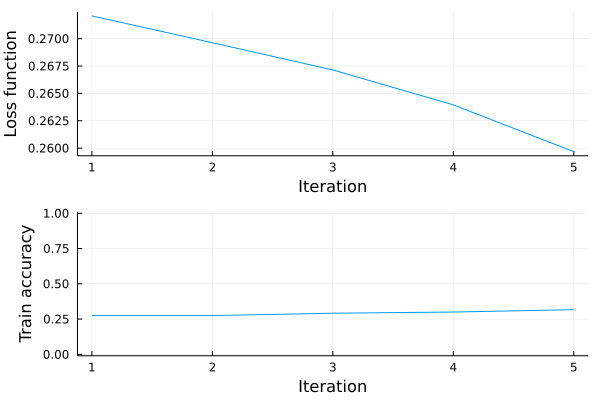

In [68]:
plotLossAccuracy(aniaLossHistory, AniaAccHistory)

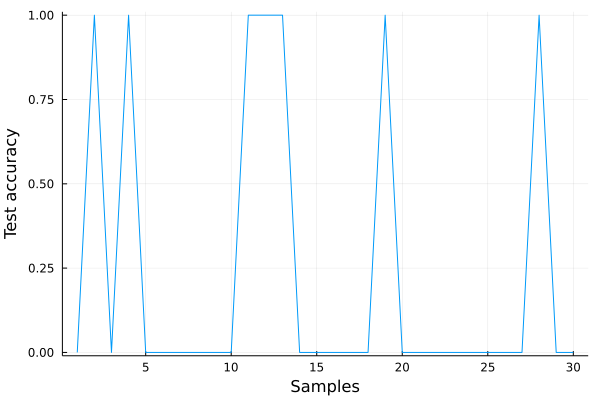

In [69]:
plotTestAccuracty(aniaAccuracyTestHistory)

## Sieć Sebastiana

In [70]:
include("nets/netSebastian.jl")
Random.seed!(4)
sebastianNet = getSebastianDefaultNet(4)
sebastianTrainLoss, sebastianTrainAccHistory = trainSebastian(sebastianNet, X_train, y_train, 5, 0.01)

sebastianTrainAccVal = getTrainingAccValFromHistory(sebastianTrainAccHistory)
sebastianTestAccuracy, sebastianTestAccVal = accuracySebastian(sebastianNet, X_test, y_test)
nothing


### Wykresy

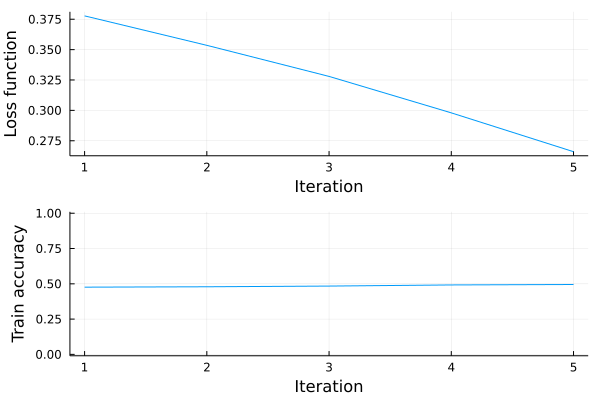

In [71]:
plotLossAccuracy(sebastianTrainLoss, sebastianTrainAccHistory)

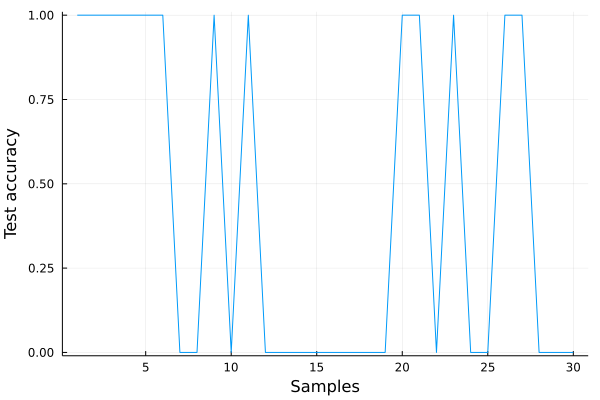

In [72]:
plotTestAccuracty(sebastianTestAccuracy)

In [12]:
df_learning_results = DataFrame(Net=String[], TestAccuracy=Float64[], TrainAccuracy=Float64[], LossFunctionMinimum=Float64[], LossFunctionMaximum=Float64[],LossFunctionStd=Float64[] )
push!(df_learning_results, ("Flux", fluxAccuracyTestVal, fluxAccuracyTrainingVal, minimum(fluxLossHistory), maximum(fluxLossHistory), std(fluxLossHistory)))
push!(df_learning_results, ("Ania", AniaTestAccVal, aniaAccTrainVal, minimum(aniaLossHistory), maximum(aniaLossHistory), std(aniaLossHistory)))
push!(df_learning_results, ("Sebastian", sebastianTestAccVal, sebastianTrainAccVal, minimum(sebastianTrainLoss), maximum(sebastianTrainLoss), std(sebastianTrainLoss)))
println("HIDDEN LAYERS:",3)
print(df_learning_results)

HIDDEN LAYERS:3
3×6 DataFrame
 Row │ Net        TestAccuracy  TrainAccuracy  LossFunctionMinimum  LossFunctionMaximum  LossFunctionStd 
     │ String     Float64       Float64        Float64              Float64              Float64         
─────┼───────────────────────────────────────────────────────────────────────────────────────────────────
   1 │ Flux           0.333333       0.366667             0.590541             0.638991       0.0191503
   2 │ Ania           0.9            0.6                  0.1295               0.142709       0.00471724
   3 │ Sebastian      0.333333       0.394928             0.191496             0.203831       0.00481354

### Benchmarki trenowania sieci z różną ilością warstw ukrytych

In [61]:
using BenchmarkTools
Random.seed!(123)
nHiddens_List = [6,8,16]
for hidden in nHiddens_List
    display("----------------------------------------------------------------------------------------------------------")
    include("nets/netFlux.jl")
    fluxNet, opt, loss, params = getDefaultFlux(hidden)
    t1 = @benchmark trainFlux(fluxNet, params, X_train, y_train, 10, opt, loss)
    include("nets/netAnia.jl")
    aniaNet = getDefaultAniaNet(hidden)
    t2 = @benchmark trainAnia(aniaNet, X_train, y_train, 10, 0.01)
    include("nets/netSebastian.jl")
    sebastianNet = getSebastianDefaultNet(hidden)
    t3 = @benchmark trainSebastian(sebastianNet, X_train, y_train, 10, 0.010)

    display("-------------------------------FLUX----------HIDDEN LAYERS: $hidden")
    display(t1)
    display("-------------------------------Ania----------HIDDEN LAYERS: $hidden")
    display(t2)
    display("-------------------------------Sebastian----------HIDDEN LAYERS: $hidden")
    display(t3)
end
nothing

"----------------------------------------------------------------------------------------------------------"

"-------------------------------FLUX----------HIDDEN LAYERS: 6"

BenchmarkTools.Trial: 5223 samples with 1 evaluation.
 Range (min … max):  560.000 μs …  17.059 ms  ┊ GC (min … max): 0.00% … 88.74%
 Time  (median):     704.200 μs               ┊ GC (median):    0.00%
 Time  (mean ± σ):   948.891 μs ± 986.495 μs  ┊ GC (mean ± σ):  8.15% ±  8.05%

  ▅█▇▅▅▄▄▄▄▃▃▃▂▂▁▂▁▁▁▁▁                                         ▂
  ███████████████████████████▇█▇▆▆▇▆▆▅▄▅▅▆▅▃▄▃▅▄▅▃▁▃▃▁▃▃▁▁▄▃▄▁▄ █
  560 μs        Histogram: log(frequency) by time       3.74 ms <

 Memory estimate: 1.01 MiB, allocs estimate: 913.

"-------------------------------Ania----------HIDDEN LAYERS: 6"

BenchmarkTools.Trial: 7 samples with 1 evaluation.
 Range (min … max):  735.316 ms … 895.384 ms  ┊ GC (min … max): 2.43% … 2.64%
 Time  (median):     772.540 ms               ┊ GC (median):    4.66%
 Time  (mean ± σ):   797.386 ms ±  61.700 ms  ┊ GC (mean ± σ):  4.12% ± 1.11%

  ██       █    █                   █          █              █  
  ██▁▁▁▁▁▁▁█▁▁▁▁█▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁█▁▁▁▁▁▁▁▁▁▁█▁▁▁▁▁▁▁▁▁▁▁▁▁▁█ ▁
  735 ms           Histogram: frequency by time          895 ms <

 Memory estimate: 209.73 MiB, allocs estimate: 2728888.

"-------------------------------Sebastian----------HIDDEN LAYERS: 6"

BenchmarkTools.Trial: 27 samples with 1 evaluation.
 Range (min … max):  166.574 ms … 226.626 ms  ┊ GC (min … max):  0.00% … 10.09%
 Time  (median):     180.002 ms               ┊ GC (median):    10.36%
 Time  (mean ± σ):   188.211 ms ±  17.439 ms  ┊ GC (mean ± σ):   9.57% ±  2.78%

            █                                                    
  ▅▁▁▁▁▁█▅▁▅█▁███▁▁▅▁▁▁▅▅▁▁▁▁▁▅▁▅▁▁▁▁▁▁▁▁▁▁▅▁▁▁▁▁▁█▁▁▁▁▁▅▁▁▅▁▁▅ ▁
  167 ms           Histogram: frequency by time          227 ms <

 Memory estimate: 112.91 MiB, allocs estimate: 1142607.

"----------------------------------------------------------------------------------------------------------"

"-------------------------------FLUX----------HIDDEN LAYERS: 8"

BenchmarkTools.Trial: 5080 samples with 1 evaluation.
 Range (min … max):  593.400 μs …  20.382 ms  ┊ GC (min … max): 0.00% … 0.00%
 Time  (median):     729.150 μs               ┊ GC (median):    0.00%
 Time  (mean ± σ):   966.358 μs ± 986.697 μs  ┊ GC (mean ± σ):  7.87% ± 8.52%

  █▇▅▄▄▃▂▂▂▁ ▁                                                  ▁
  █████████████▇▇▇▆▇▆▅▆▆▅▄▅▄▄▃▅▄▄▃▁▄▁▁▁▁▁▁▃▁▁▁▄▃▁▁▁▃▁▁▁▁▁▁▃▃▁▁▄ █
  593 μs        Histogram: log(frequency) by time       7.46 ms <

 Memory estimate: 1.15 MiB, allocs estimate: 913.

"-------------------------------Ania----------HIDDEN LAYERS: 8"

BenchmarkTools.Trial: 5 samples with 1 evaluation.
 Range (min … max):  1.017 s …   1.044 s  ┊ GC (min … max): 3.63% … 3.39%
 Time  (median):     1.026 s              ┊ GC (median):    3.60%
 Time  (mean ± σ):   1.028 s ± 11.335 ms  ┊ GC (mean ± σ):  4.25% ± 1.01%

  █  █              █              █                      █  
  █▁▁█▁▁▁▁▁▁▁▁▁▁▁▁▁▁█▁▁▁▁▁▁▁▁▁▁▁▁▁▁█▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁█ ▁
  1.02 s         Histogram: frequency by time        1.04 s <

 Memory estimate: 295.17 MiB, allocs estimate: 3556888.

"-------------------------------Sebastian----------HIDDEN LAYERS: 8"

BenchmarkTools.Trial: 21 samples with 1 evaluation.
 Range (min … max):  225.003 ms … 275.790 ms  ┊ GC (min … max): 8.37% … 14.15%
 Time  (median):     240.156 ms               ┊ GC (median):    7.83%
 Time  (mean ± σ):   243.848 ms ±  16.296 ms  ┊ GC (mean ± σ):  9.51% ±  2.85%

  █▁▁▁  ▁▁     ▁▁ ▁ █▁          ▁ ▁  ▁ ▁   ▁            ▁    ▁▁  
  ████▁▁██▁▁▁▁▁██▁█▁██▁▁▁▁▁▁▁▁▁▁█▁█▁▁█▁█▁▁▁█▁▁▁▁▁▁▁▁▁▁▁▁█▁▁▁▁██ ▁
  225 ms           Histogram: frequency by time          276 ms <

 Memory estimate: 152.46 MiB, allocs estimate: 1495407.

"----------------------------------------------------------------------------------------------------------"

"-------------------------------FLUX----------HIDDEN LAYERS: 16"

BenchmarkTools.Trial: 4279 samples with 1 evaluation.
 Range (min … max):  716.400 μs … 23.331 ms  ┊ GC (min … max): 0.00% … 93.94%
 Time  (median):     873.400 μs              ┊ GC (median):    0.00%
 Time  (mean ± σ):     1.160 ms ±  1.121 ms  ┊ GC (mean ± σ):  9.22% ±  9.89%

  ██▅▄▃▂▃▂▂▂▂▁▁                                                ▁
  █████████████▇▇▇▆▇▅▆▃▅▃▄▃▅▄▁▃▄▄▃▁▁▁▁▁▁▁▁▃▁▁▁▁▁▁▁▁▁▁▁▅▄▃▅▁▅▅▃ █
  716 μs        Histogram: log(frequency) by time      8.16 ms <

 Memory estimate: 1.72 MiB, allocs estimate: 913.

"-------------------------------Ania----------HIDDEN LAYERS: 16"

BenchmarkTools.Trial: 2 samples with 1 evaluation.
 Range (min … max):  2.231 s …    2.804 s  ┊ GC (min … max): 5.07% … 4.21%
 Time  (median):     2.518 s               ┊ GC (median):    4.59%
 Time  (mean ± σ):   2.518 s ± 405.406 ms  ┊ GC (mean ± σ):  4.59% ± 0.61%

  █                                                        █  
  █▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁█ ▁
  2.23 s         Histogram: frequency by time          2.8 s <

 Memory estimate: 1.09 GiB, allocs estimate: 7026088.

"-------------------------------Sebastian----------HIDDEN LAYERS: 16"

BenchmarkTools.Trial: 9 samples with 1 evaluation.
 Range (min … max):  525.333 ms … 693.935 ms  ┊ GC (min … max): 12.56% … 10.49%
 Time  (median):     582.152 ms               ┊ GC (median):    12.16%
 Time  (mean ± σ):   585.277 ms ±  47.973 ms  ┊ GC (mean ± σ):  11.86% ±  1.39%

  ▁    ▁       ▁      █ ▁▁    ▁                               ▁  
  █▁▁▁▁█▁▁▁▁▁▁▁█▁▁▁▁▁▁█▁██▁▁▁▁█▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁█ ▁
  525 ms           Histogram: frequency by time          694 ms <

 Memory estimate: 701.06 MiB, allocs estimate: 3043407.

### Przykładowe wyniki 

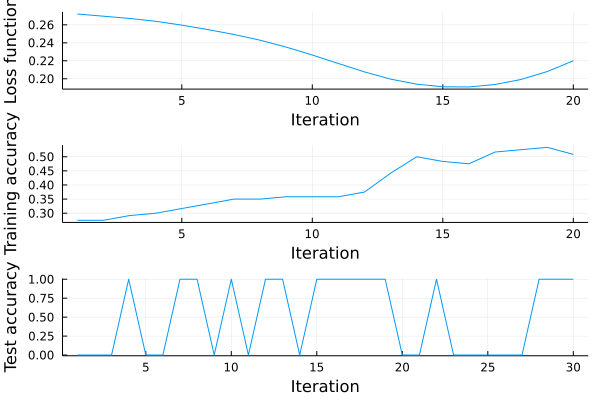

"ACCURACY: 0.5"

In [62]:
include("nets/netAnia.jl")
Random.seed!(5)
aniaLossHistory, AniaAccHistory, aniaAccTrainVal, aniaAccuracyTestHistory, AniaTestAccVal = getAniaResults(4, X_train, y_train, X_test, y_test, 20, 0.01)
tripleMetricPlot(aniaLossHistory, AniaAccHistory, aniaAccuracyTestHistory)
display("ACCURACY: $AniaTestAccVal")

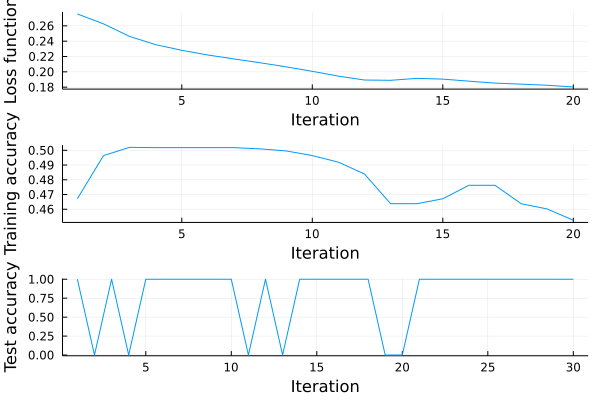

In [54]:
include("nets/netSebastian.jl")
Random.seed!(5)
sebastianTrainLoss, sebastianTrainAccHistory, sebastianTrainAccVal, sebastianTestAccuracy, sebastianTestAccVal = getSebastianResults(8, X_train, y_train, X_test, y_test, 20, 0.01) 
tripleMetricPlot(sebastianTrainLoss, sebastianTrainAccHistory, sebastianTestAccuracy)
display("ACCURACY: $sebastianTestAccVal")

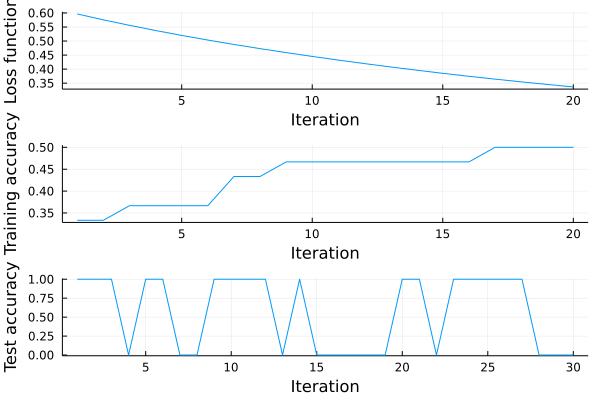

In [55]:
include("nets/netFlux.jl")
Random.seed!(5)
fluxLossHistory, fluxAccuracyTrainingHistory, fluxAccuracyTrainingVal, fluxAccuracyTestHistory, fluxAccuracyTestVal = getFluxResults(8, X_train, y_train, X_test, y_test, 20, 0.01) 
tripleMetricPlot(fluxLossHistory, fluxAccuracyTrainingHistory, fluxAccuracyTestHistory)
display("ACCURACY: $fluxAccuracyTestVal")